# Netflix


## This is an EDA (Exploratory Data Analysis) of Netflix, a streaming service platform that offers a wide variety of movies, documentaries, TV shows and etc. Data obtained from Kaggle.com

### Some simple questions that came to mind are:
### 1.How is Netflix's growth in the 21st century
### 2.Most popular type of entertainment on Netflix
### 3.Most common Movie/TV Show ratings to be released on Netflix
### 4.Prolific countries on the Netflix platform
### 5.Most common duration of Movies released on Netflix

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandasql as ps
%matplotlib inline 

#### Load dataset, and check the features of the dataset

In [3]:
df = pd.read_csv('netflix_titles.csv')
df['count'] = 1
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  count         7787 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 791.0+ KB


In [5]:
print("Rows                :", df.shape[0])
print("Columns             :", df.shape[1])
print("Features :          :", df.columns.tolist())
print("Missing Values      :", df.isnull().values.sum())
print("Unique Values       :", df.nunique())

Rows                : 7787
Columns             : 13
Features :          : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'count']
Missing Values      : 3631
Unique Values       : show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
count              1
dtype: int64


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
count              0
dtype: int64

##### Quite alot of null values were found. Due to limited experience, since the values being operated have a large variety, and the director and cast column being irrelevant to my current analysis, it seemed viable to replace all missing values with the most common value occurrence of their respective columns

In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df)*100
    if null_rate > 0:
        print(f"{i}'s null rate: {null_rate}%")           

director's null rate: 30.679337357133683%
cast's null rate: 9.220495697958135%
country's null rate: 6.51085141903172%
date_added's null rate: 0.1284191601386927%
rating's null rate: 0.08989341209708489%


In [8]:
df.duplicated().value_counts()

False    7787
dtype: int64

In [9]:
df['date_added'].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
July 4, 2020           1
August 15, 2014        1
January 4, 2017        1
March 21, 2018         1
August 5, 2018         1
Name: date_added, Length: 1565, dtype: int64

In [10]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [11]:
df['date_added'].isnull().sum()

0

In [12]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [13]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [14]:
df['date_added'].isnull().sum()

0

In [15]:
df.country.value_counts()

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
Israel, Sweden, Germany, Netherlands         1
Ghana, United States                         1
United States, Australia, China              1
United Kingdom, France, Germany, Spain       1
United Kingdom, United States, France        1
Name: country, Length: 681, dtype: int64

In [16]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'].value_counts()

United States                             3062
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
Israel, Sweden, Germany, Netherlands         1
Ghana, United States                         1
United States, Australia, China              1
United Kingdom, France, Germany, Spain       1
United Kingdom, United States, France        1
Name: country, Length: 681, dtype: int64

In [17]:
df = df.drop(['director', 'cast'], axis=1)

In [18]:
q1="""
SELECT  type, release_year
FROM df
WHERE release_year > 1980
"""
sqldf = ps.sqldf(q1, locals())
sqldf.count()

type            7660
release_year    7660
dtype: int64

<AxesSubplot:title={'center':'Content Over the Years'}, ylabel='Frequency'>

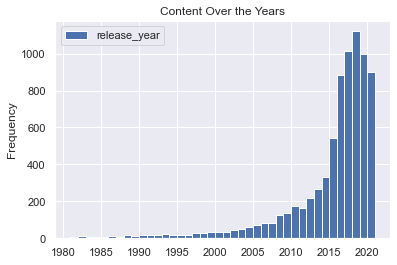

In [19]:
# Increase in movies and tv shows releases due to advancement of technologies, internet improvements, and platform services 
sns.set(style='darkgrid')
sqldf.plot (kind='hist', bins = 40, title='Content Over the Years')

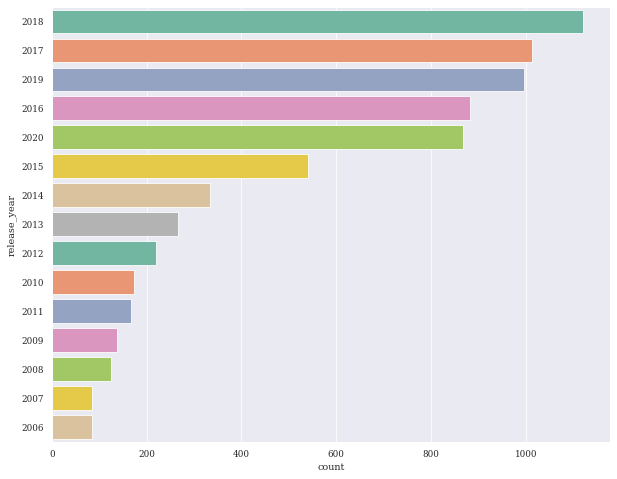

In [47]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

<AxesSubplot:xlabel='type', ylabel='count'>

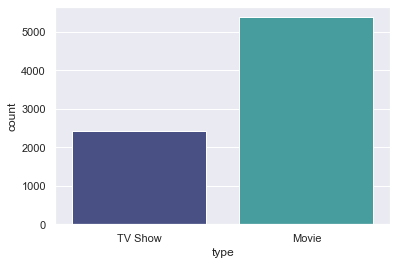

In [21]:
sns.countplot (data=df, x='type',palette='mako')

Text(0.5, 1.0, 'Content Type on Netflix')

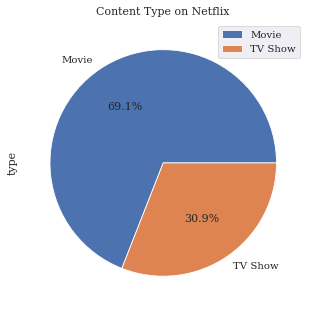

In [22]:
df_pie = df.groupby('type')['type'].count()
plt.figure(figsize=(10, 5), dpi=75)
sns.set(font='serif', context = 'paper', font_scale = 1.1)
df_pie.plot(kind ='pie', x='type', autopct = '%1.1f%%', legend = True)
plt.title ('Content Type on Netflix')

In [23]:
#df['date_added'] = pd.to_datetime(df['date_added'])
#df['month'] = df['date_added'].dt.month
#df['year'] = df['date_added'].dt.year
df_date = df[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date['month'] = df_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

Text(0.5, 1.0, 'Netflix Content Release Frequency')

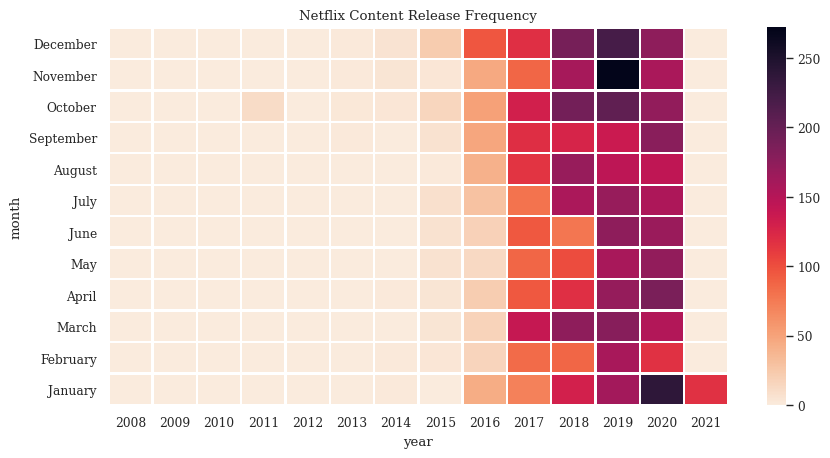

In [24]:
release_frequency = df_date.groupby('year')['month'].value_counts().unstack().fillna(0)[order_month].T
plt.figure(figsize=(10, 5), dpi=100)
sns.set(font='serif', context = 'paper', font_scale = 1)
ax = sns.heatmap(release_frequency,linewidth = 1, cmap='rocket_r')
ax.set_title('Netflix Content Release Frequency')


In [25]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['year'].head(3)

0    2020
1    2016
2    2018
Name: year, dtype: int64

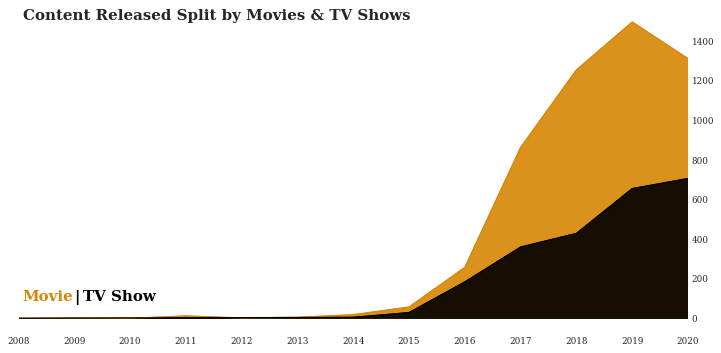

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_facecolor('white')
color = ["#d88604", "#000000"]
for i, tvm in enumerate(df['type'].value_counts().index):
    tvm_total = df[df['type'] == tvm]['year'].value_counts().sort_index()
    ax.plot(tvm_total.index, tvm_total, color=color[i], label=tvm)
    ax.fill_between(tvm_total.index, 0, tvm_total, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Content Released Split by Movies & TV Shows', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#d88604')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#000000')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### *How is Netflix's growth in the 21st century & the most popular type of entertainment on Netflix*
With the support of all the plots above, Netflix in the 21st century experienced a big boom around the start of 2015, probably aided by the popular concept of content streaming platforms, and with the advancement of internet infastructure, availability and accessbility, people are flocking to the idea of watching their favourite entertainment shows through the internet instead of traditional cable or satelitte television service. With the Covid pandemic affecting outdoor activites world wide,even tho content releases have taken a slight dip, it also aided the surge of Netflix service consumption among worlds population. Since movie theaters and most retail shops during the pandemic are closed off to the public, people also get their movie watching 'fix' through Netflix, and the focus on Netflix seems to be increasing more Movie releases instead of TV Shows.


In [27]:
df_shows = df[df['type'] == 'TV Show']

In [28]:
df_movies = df[df['type'] == 'Movie']

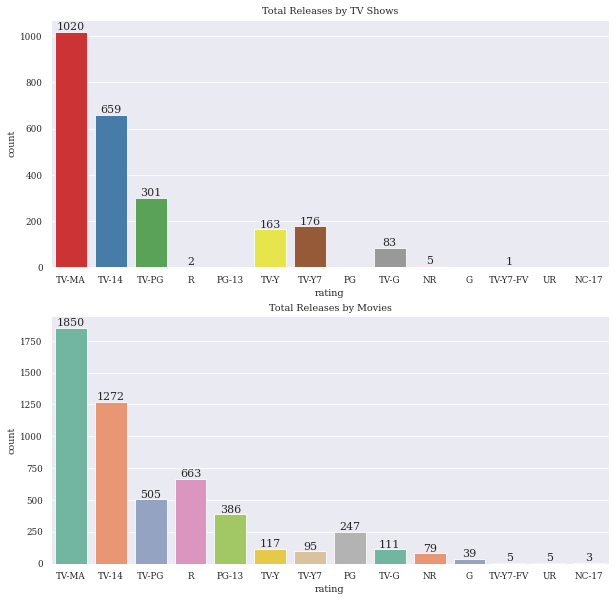

In [29]:
#plt.figure(figsize=(10,6), dpi=75)
#gs = gridspec.GridSpec(nrows=2,ncols=1) 
#ax = plt.subplot(gs[0])
#sns.countplot(x="rating", data=df_movies, palette="Set2", order=df['rating'].value_counts().index[0:15])
#ax.set_title ('Total Releases by Movies')



#ax2 = plt.subplot(gs[1])
#sns.countplot(x="rating", data=df_shows, palette="Set1", order=df['rating'].value_counts().index[0:15])
#ax2.set_title ('Total Releases by TV Shows')



fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
plt.subplot(2, 1, 2)
ax =sns.countplot(x="rating", data=df_movies, palette="Set2", order=df['rating'].value_counts().index[0:15])
plt.title ('Total Releases by Movies')
for p in ax.patches:
    values= '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(values, (x, y),ha='center', va ='bottom', fontsize = 11)


plt.subplot(2, 1, 1)
ax = sns.countplot(x="rating", data=df_shows, palette="Set1", order=df['rating'].value_counts().index[0:15])
plt.title ('Total Releases by TV Shows')
for p in ax.patches:
    values = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(values, (x, y),ha='center', va ='bottom', fontsize = 11)

In [30]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending = False).reset_index())
rating_order = list(order['rating'])

In [31]:
rating_type = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = rating_type.loc['Movie']
shows = -rating_type.loc['TV Show'] #'-' sign to make values negative

In [32]:
rating_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Movie to TV Show
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TV-MA     2 non-null      int32
 1   TV-14     2 non-null      int32
 2   TV-PG     2 non-null      int32
 3   R         2 non-null      int32
 4   PG-13     2 non-null      int32
 5   TV-Y      2 non-null      int32
 6   TV-Y7     2 non-null      int32
 7   PG        2 non-null      int32
 8   TV-G      2 non-null      int32
 9   NR        2 non-null      int32
 10  G         2 non-null      int32
 11  TV-Y7-FV  2 non-null      int32
 12  UR        2 non-null      int32
 13  NC-17     2 non-null      int32
dtypes: int32(14)
memory usage: 236.0+ bytes


Text(0.82, 0.9, 'TV Show')

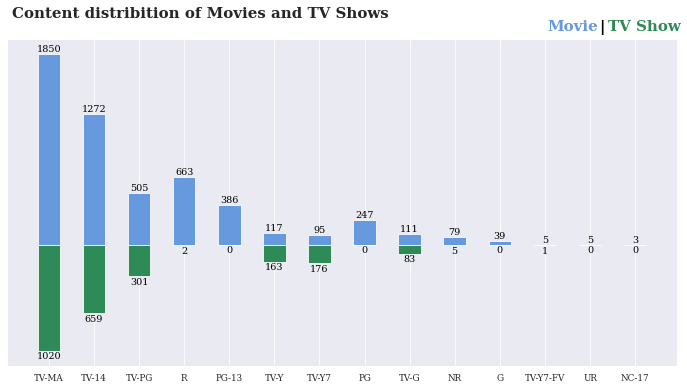

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(movie.index, movie, width = 0.5, color = '#69d', label = 'Movie')
ax.bar(shows.index, shows, width = 0.5, color = 'seagreen', label = 'TV Shows')

for i in movie.index:
    ax.annotate(f"{-shows[i]}",# '-' sign to make the values positive while being displayed inversely based on earlier grouping 
                xy=(i, shows[i]-50), 
                va = 'center', ha = 'center', color ='black')
    
for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                xy=(i, movie[i]+50), 
                va = 'center', ha = 'center', color ='black')
    
ax.set_yticks([]) 

fig.text(0.13, 0.93, 'Content distribition of Movies and TV Shows ',fontweight='bold', fontsize = 15)
fig.text(0.75,0.9,'Movie', fontweight='bold',  fontsize=15, color='#69d')
fig.text(0.81,0.9,'|', fontweight='bold',  fontsize=15, color='black')
fig.text(0.82,0.9,'TV Show', fontweight='bold',  fontsize=15, color='seagreen')

### *Most common Movie/TV Show ratings to be released on Netflix*
Through the above various observations, content released are catered to the teenager and mature adult audiences the most, as shown by the TV-MA and TV-14 rating. Some ratings are applicable only to Movies for example the PG-12 and R rating.

In [34]:
from collections import Counter

In [35]:
df_country = df['country']
country_counts = pd.Series(dict(Counter(','.join(df_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False) #split commas/whitespace

In [36]:
tot = sum(country_counts)
top20 = sum(country_counts[:20])
print("Total Countries:", tot )
print("Top 20 Countries:", top20)           

Total Countries: 9574
Top 20 Countries: 8386


In [37]:
top20_country = country_counts[:20]

(-1.1070181530907104,
 1.1003341977662242,
 -1.1014978718629325,
 1.1254767803447103)

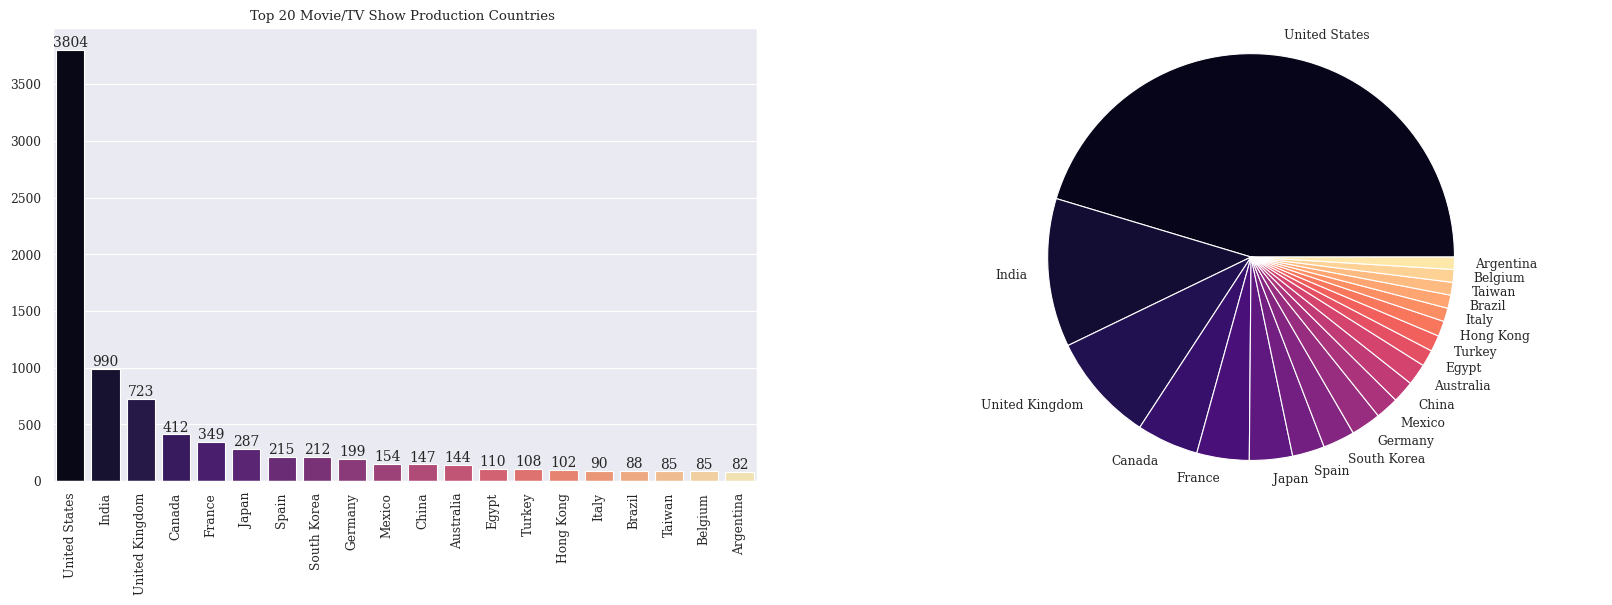

In [38]:
from matplotlib import gridspec 
plt.figure(figsize=(20,6), dpi=100)
gs = gridspec.GridSpec(nrows=1,ncols=2) 
ax = plt.subplot(gs[0])
sns.barplot( x = top20_country.index, y = top20_country, ax = ax, palette='magma')
ax.set_xticklabels( top20_country.index, rotation = '90')
ax.set_title( 'Top 20 Movie/TV Show Production Countries ')
for p in ax.patches:
    values = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(values, (x, y),ha='center', va ='bottom', fontsize = 10)

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index, shadow=False, startangle=0,colors=sns.color_palette("magma", n_colors=20))
ax2.axis('equal')

(0.0, 100.0, 0.0, 100.0)

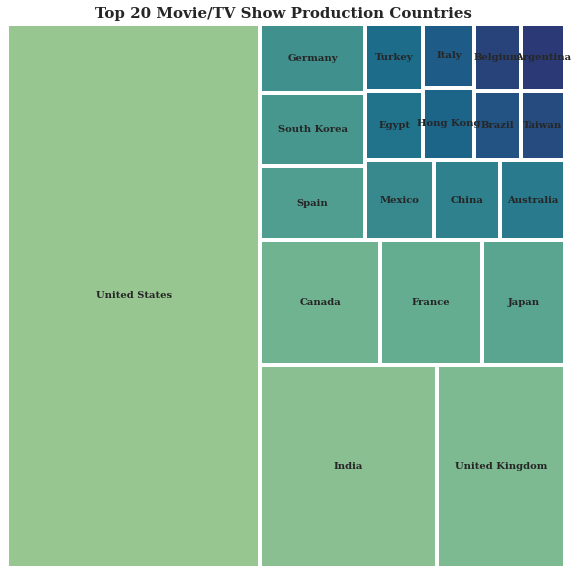

In [39]:
import squarify
y = top20_country
plt.figure(figsize = (10,10))
squarify.plot(sizes = y.values, label=y.index,color=sns.color_palette("crest", n_colors=20), linewidth = 4, text_kwargs={'fontsize' : 10, 'fontweight' : 'bold'} )
plt.title( 'Top 20 Movie/TV Show Production Countries ', fontsize = 15, fontweight='bold')
plt.axis('off')

In [40]:
country_order = country_counts[:10].index
country_order

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'],
      dtype='object')

In [41]:
data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data['sum'] = data.sum(axis=1)
data_ratio = (data.T / data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie')[::-1]
data_ratio.head(10)

type,Movie,TV Show
India,0.923077,0.076923
Germany,0.688525,0.311475
United States,0.679295,0.320705
Canada,0.666667,0.333333
Spain,0.664179,0.335821
Mexico,0.650000,0.350000
France,0.600000,0.400000
United Kingdom,0.486146,0.513854
Japan,0.305310,0.694690
South Korea,0.196721,0.803279


Text(0.82, 0.9, 'TV Show')

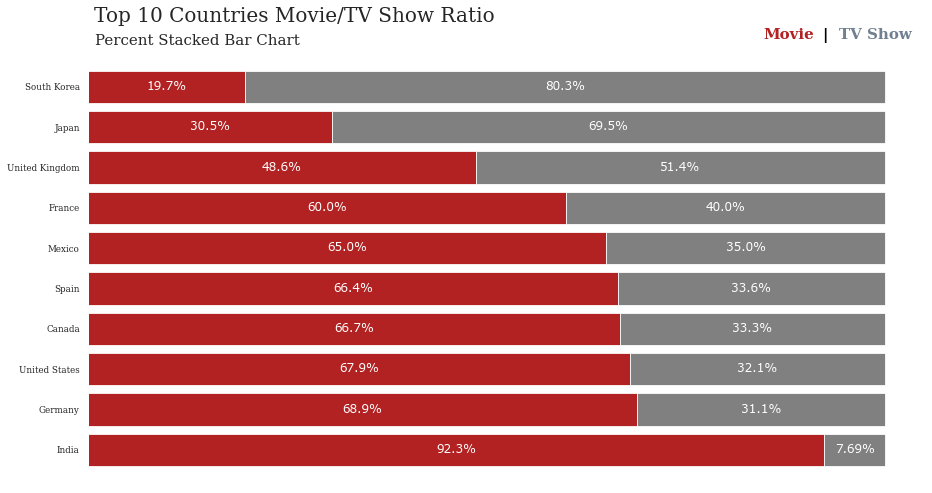

In [42]:
fig, ax =plt.subplots(1,1, figsize = (15,8))
ax.set_facecolor('white')
ax.barh(data_ratio.index, data_ratio['Movie'], color = 'firebrick', label ='Movie')
ax.barh(data_ratio.index, data_ratio['TV Show'], left = data_ratio['Movie'], color = 'grey', label ='TV Show')


ax.set_xticks([])



for i in data_ratio.index:
    ax.annotate(f"{data_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='verdana',
                   color='white')

for i in data_ratio.index:
    ax.annotate(f"{data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_ratio['Movie'][i] + data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='verdana',
                   color='white')
    
fig.text(0.13, 0.93, 'Top 10 Countries Movie/TV Show Ratio', fontsize = 20)
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart',fontsize = 15)                

    
fig.text(0.75,0.9,'Movie', fontweight='bold',  fontsize=15, color='firebrick')
fig.text(0.805,0.9,'|', fontweight='bold',  fontsize=15, color='black')
fig.text(0.82,0.9,'TV Show', fontweight='bold',  fontsize=15, color='slategrey')

#annotations are still a thing i cant really get a hang off. sigh. 

### Prolific countries on the Netflix platform
Just for a random testing purpose I seleceted the top 20/10 countries that released the most content on Netflix. Unsurprisingly, the United States, which is the birthplace of Netflix itself drwafs its comrades on content released, accounting for almost 50% amongst the top 20, followed by India, the United Kingdom, comprising the top 3. When comparing by Movie and TV Show types, India is the largest producer of Movies probably due to the Bollywood culture being very influential, while inversely, South Korea has the most TV Shows released, also likely because of the popular Korean Dramas that South Korea is popular for worldwide.

In [43]:
countries_west = ['United States', 'Canada', 'United Kingdom', 'France', 'Spain']
countries_east = ['India', 'South Korea', 'Japan', 'Australia', 'Hong Kong']
def country_mov_dur(country):
    country_dur = df.loc[(df['country']==str(country)) & (df['type'] == 'Movie')].duration
    country_dur = country_dur.apply(lambda x : int(x.strip('minSeaso'))) #removing 'Seasons' and 'min' with 'minSeaso'
    return country_dur

In [44]:
countries_west + countries_east

['United States',
 'Canada',
 'United Kingdom',
 'France',
 'Spain',
 'India',
 'South Korea',
 'Japan',
 'Australia',
 'Hong Kong']

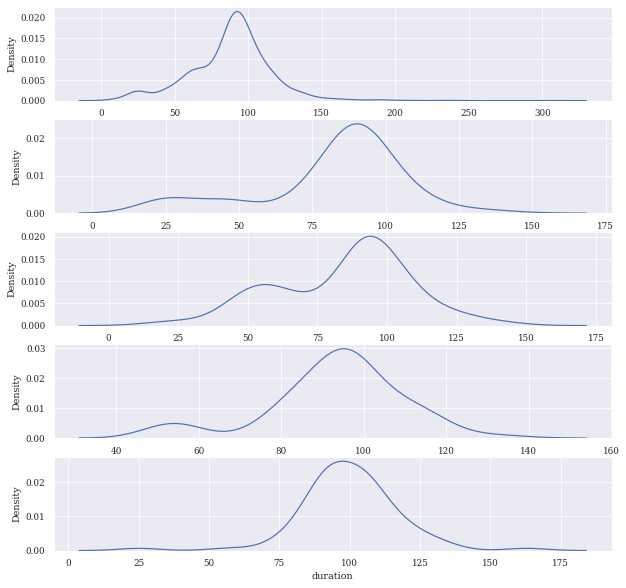

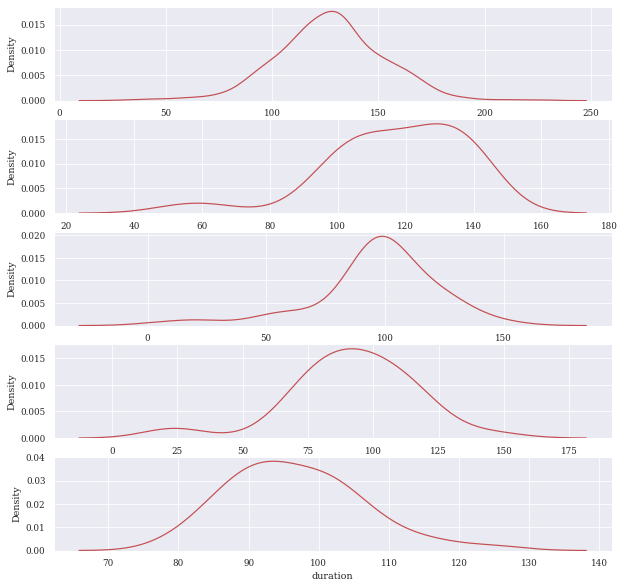

In [45]:
fig, axes = plt.subplots(5,1,figsize=(10,10))
for i in range (5):
        country_movies_duration = country_mov_dur(str(countries_west[i]))
        
        sns.kdeplot(x = country_movies_duration, color='b',ax=axes[i])
        
        
fig, axes = plt.subplots(5,1,figsize=(10,10))
for i in range (5):
        country_movies_duration = country_mov_dur(str(countries_east[i]))
        
        sns.kdeplot(x = country_movies_duration, color='r',ax=axes[i])

### Most common duration of Movies released on Netflix
I only selected 5 countries to represent the East and West differences as a rough example, with Blue graphs representing the West, and Red graphs representing the East. In the end though all the graphs display a common average of around 100 to 120 minutes duration for the movies released. I guess 3 hour Movies are not popular anymore and with how society is operating and the hectic, fast-paced, instant busy lifestyle that everyone is living, not everyone has so much time on their hands anymore for entertainment or other activities.